<a href="https://colab.research.google.com/github/emivlp/bank_marketing_analysis/blob/main/bank_marketing_campains_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Marketing Campaign Analysis: Predicting Term Deposit Subscription

## **Introduction**

 Welcome to this comprehensive notebook dedicated to analyzing bank marketing campaigns! Our primary objective is to predict whether a client will subscribe to a term deposit after a telemarketing campaign.  This analysis is crucial for optimizing marketing strategies and resource allocation in the banking sector. [UCI Machine Learning Repository](https://archive.ics.uci.edu/).

In this notebook, we will methodically navigate through the following stages:

1.  **Setup and Data Loading**: We begin by importing essential Python libraries and loading the Bank Marketing dataset. This step ensures our environment is correctly configured and the data is ready for exploration.
2.  **Exploratory Data Analysis (EDA)**:  We delve into understanding the dataset through visualizations and statistical summaries.  Our focus will be on identifying patterns and insights within both categorical and numerical features, particularly in relation to the campaign outcome.
3.  **Data Cleaning and Feature Engineering**:  This critical phase involves preparing the data for machine learning. We will handle data transformations, create new features, and encode categorical variables to enhance model performance.
4.  **Model Building and Evaluation**: We will construct and evaluate several machine learning models using a structured pipeline approach.  This includes hyperparameter tuning using Grid Search and robust evaluation using cross-validation and metrics like accuracy and ROC-AUC.
5.  **In-depth Analysis of the Best Model**:  We will perform a deeper dive into the top-performing model, examining feature importance, ROC curves, and Out-of-Bag (OOB) scores to gain actionable insights.
6.  **Conclusions and Recommendations**:  Finally, we will summarize our key findings and provide data-driven recommendations to improve future bank marketing campaigns.


**Citation:**  

 Moro, S., Rita, P., & Cortez, P. (2014). Bank Marketing **[Dataset]**. UCI Machine Learning Repository. [https://doi.org/10.24432/C5K306](https://doi.org/10.24432/C5K306)




 ## 1. Setup and Data Loading

- In this section, we set up our environment by importing all required Python libraries for data manipulation, machine learning, and visualization. We then load the dataset to begin our analysis.


In [1]:
import pandas as pd
import numpy as np
import time
import gc
import warnings
warnings.filterwarnings("ignore")

# Scikit-learn and other ML libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline

#!pip install category_encoders # Uncomment to install if needed

# For categorical encoding
import category_encoders as ce

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from tqdm import tqdm


In [2]:
from google.colab import files
uploaded = files.upload()



Saving bank_additional_full.csv to bank_additional_full (3).csv


In [3]:
import pandas as pd
data = pd.read_csv('bank_additional_full.csv', sep=';')

# Display first few rows and dataset shape
display(data.head(10))
print('There are {} observations with {} features'.format(data.shape[0], data.shape[1]))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


There are 41188 observations with 21 features


## **2. Exploratory Data Analysis (EDA)**

**Objective:** Understand the dataset's characteristics and identify patterns through visualizations.

- In this section, we conduct Exploratory Data Analysis (EDA) to gain insights into the dataset. We will visualize the distributions of categorical features in relation to the target variable ('y') to understand how different categories influence the likelihood of a client subscribing to a term deposit.

- We will focus on visualizing categorical features first as these often reveal immediate insights into customer segments and campaign effectiveness.


In [4]:
import pandas as pd
# ... (rest of your import statements) ...

data = pd.read_csv('bank_additional_full.csv', sep=';')

# --- Data Quality Checks ---
print("--- Initial Data Quality Checks ---")
print("\nMissing Values:")
print(data.isnull().sum()) # Check for missing values

print("\nData Types:")
print(data.info()) # Display data types

--- Initial Data Quality Checks ---

Missing Values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-n

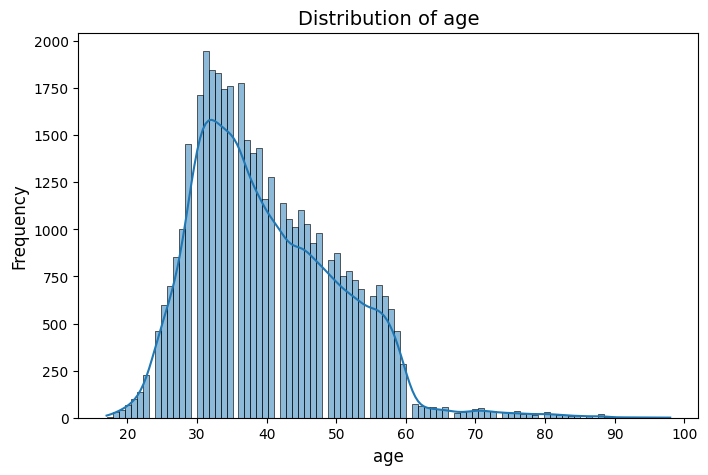

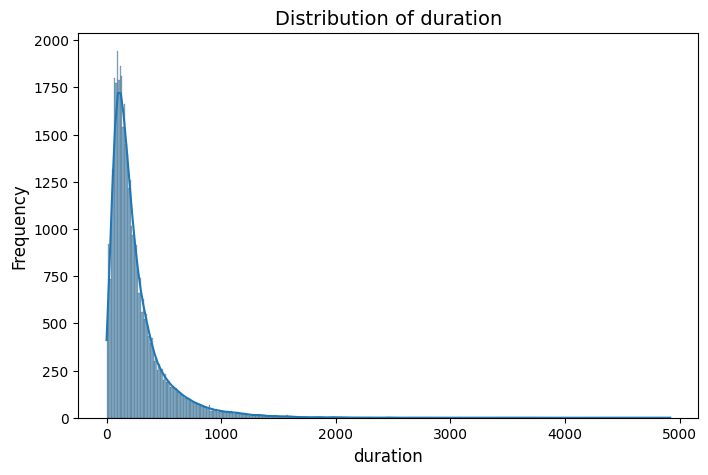

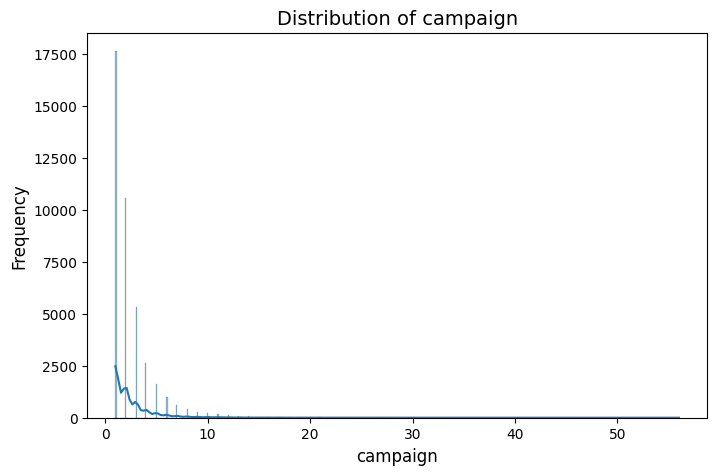

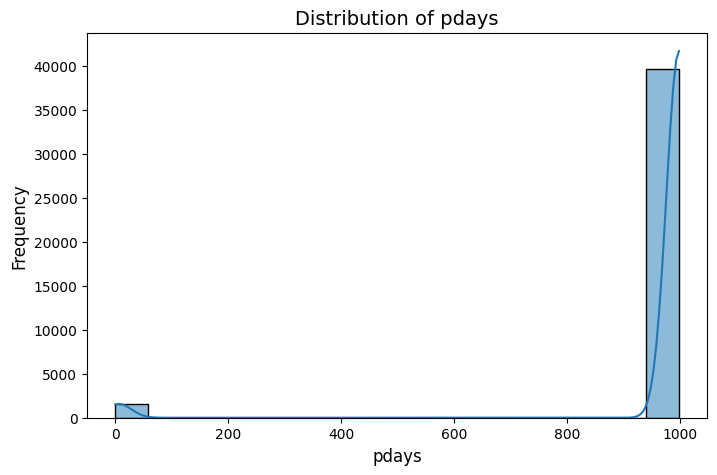

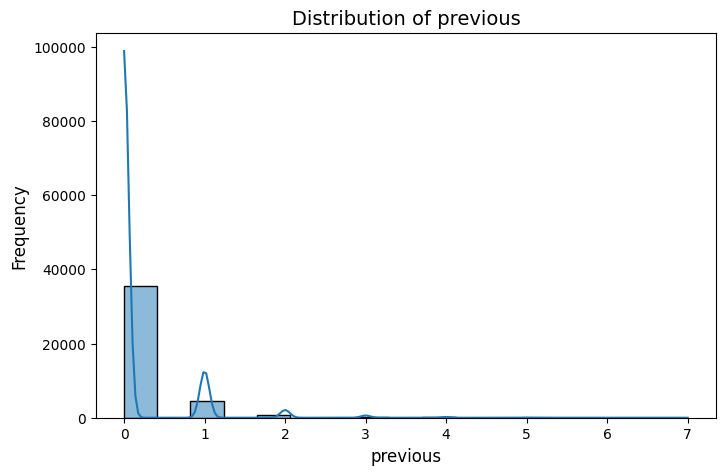

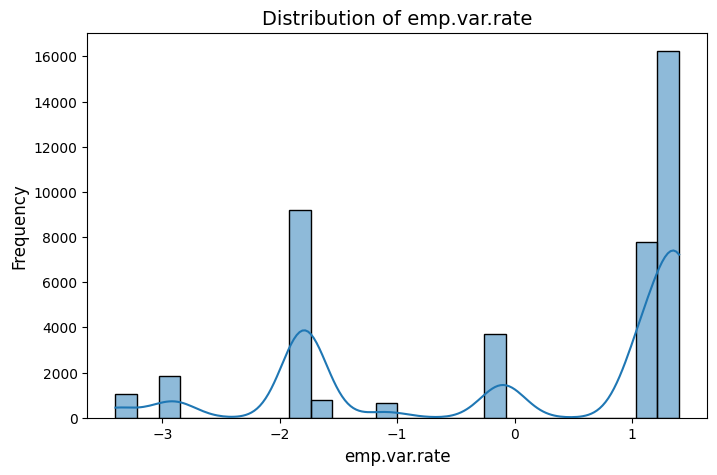

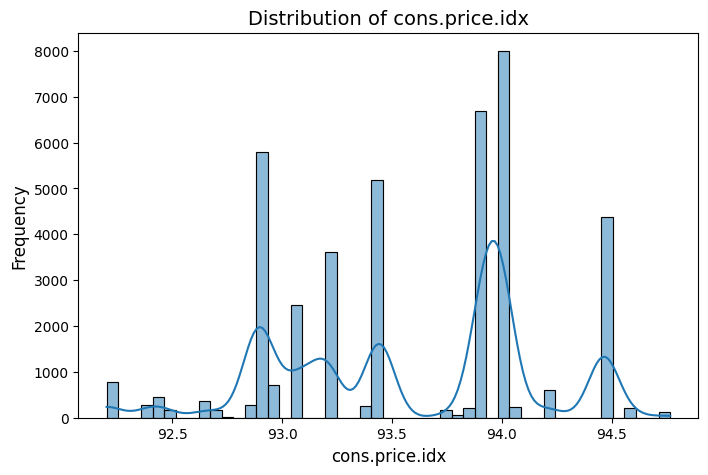

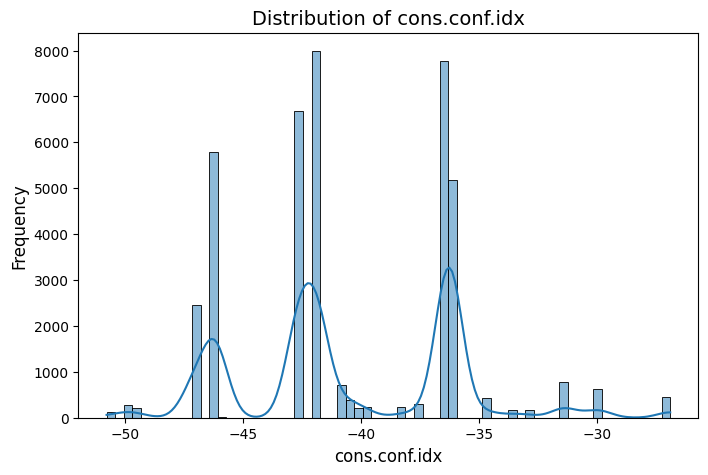

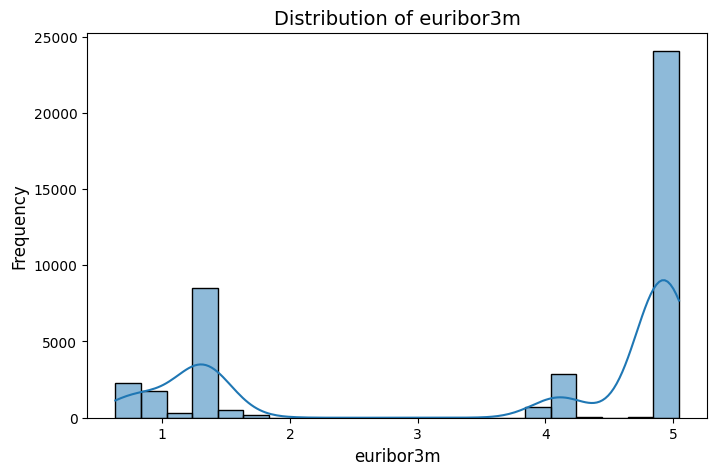

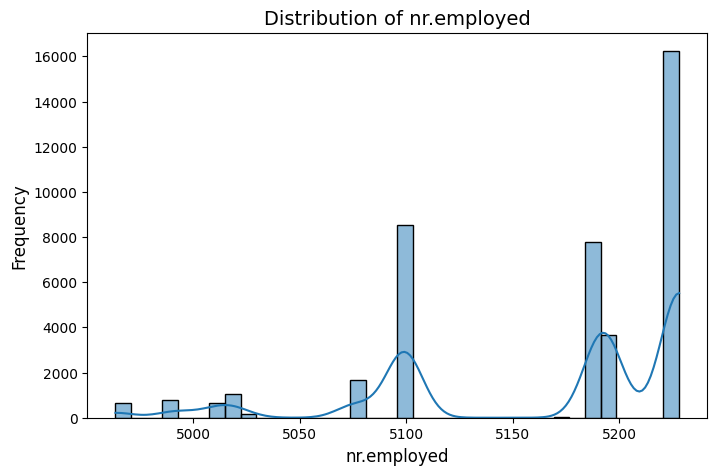

In [5]:
# --- Histograms for Numerical Features ---
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True) # kde=True adds a kernel density estimate line
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

## **2.2. Numerical Features vs. Target Variable**
- Here, we use boxplots to visualize how numerical features differ between clients who subscribed to a term deposit (y=yes) and those who did not (y=no).


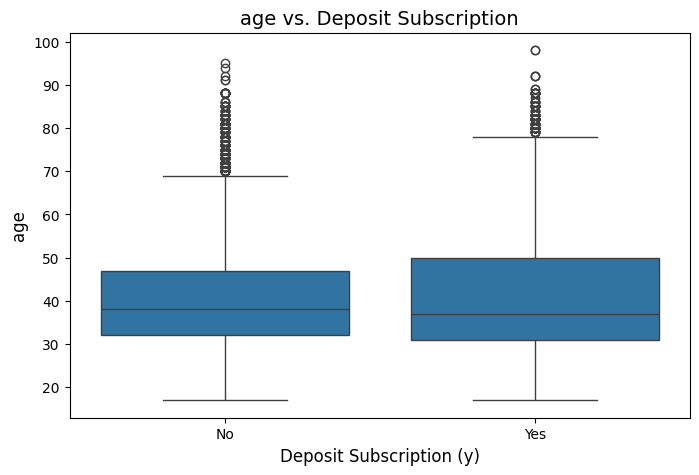

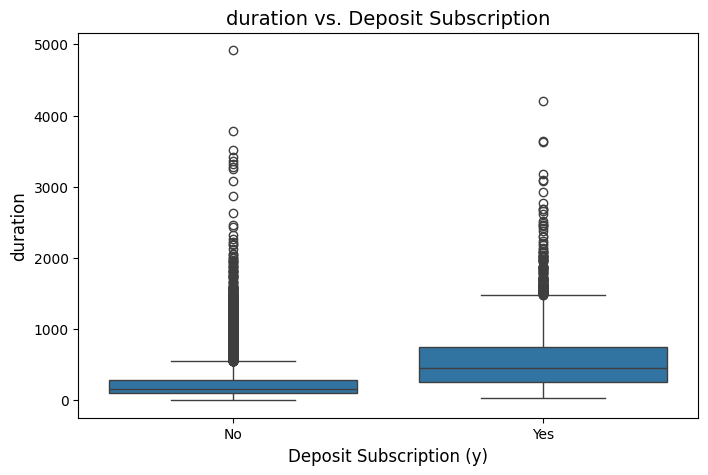

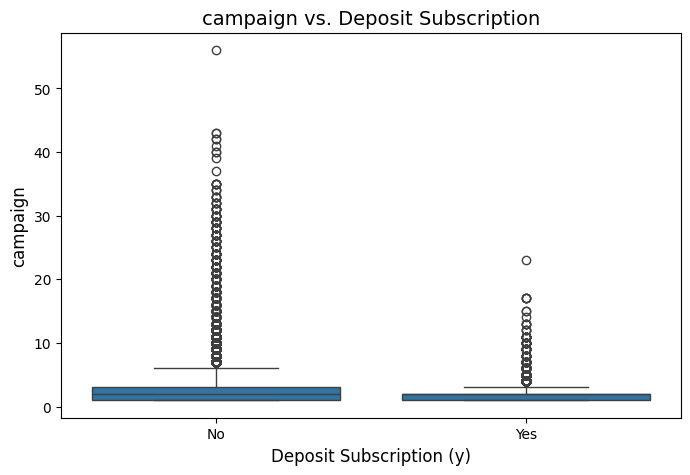

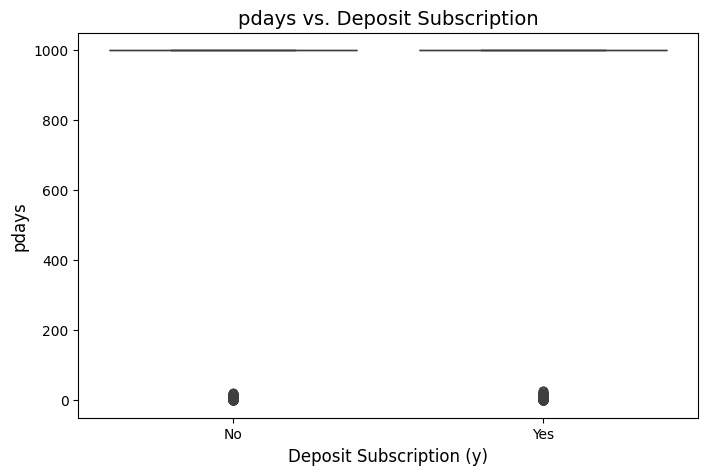

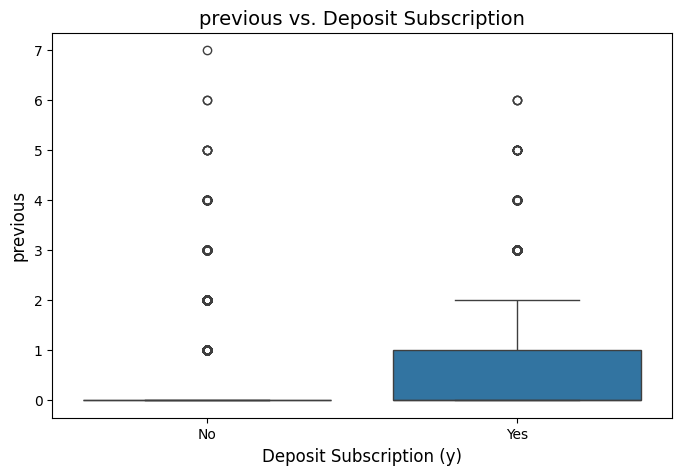

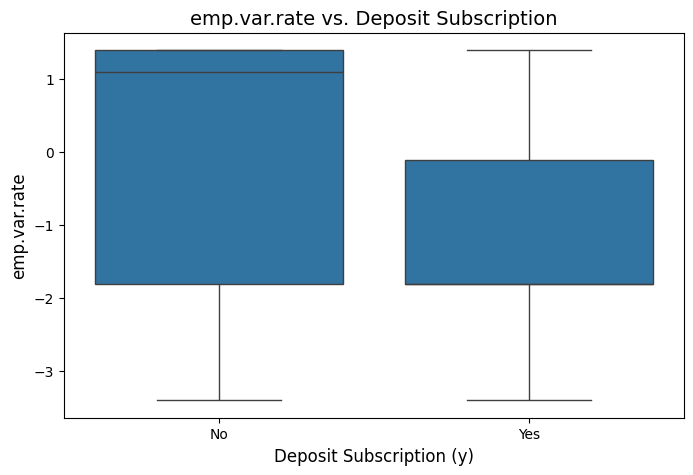

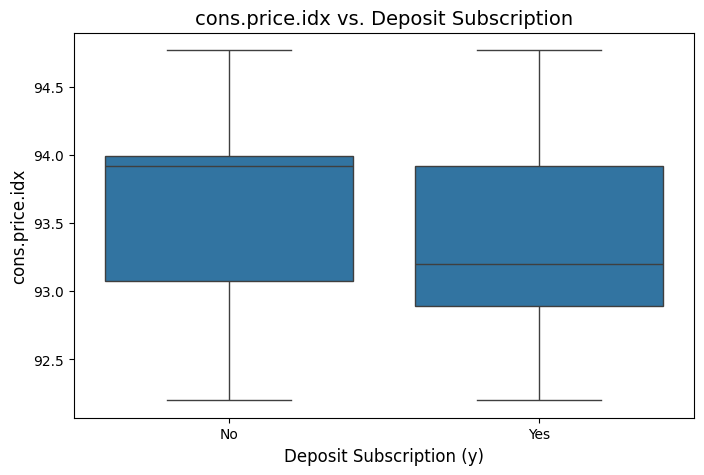

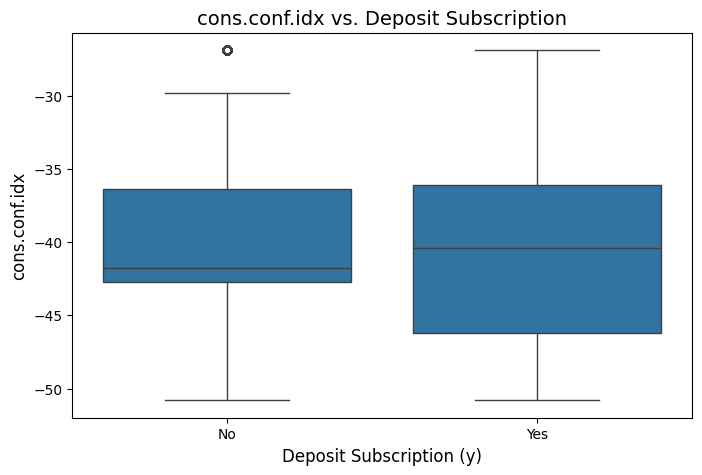

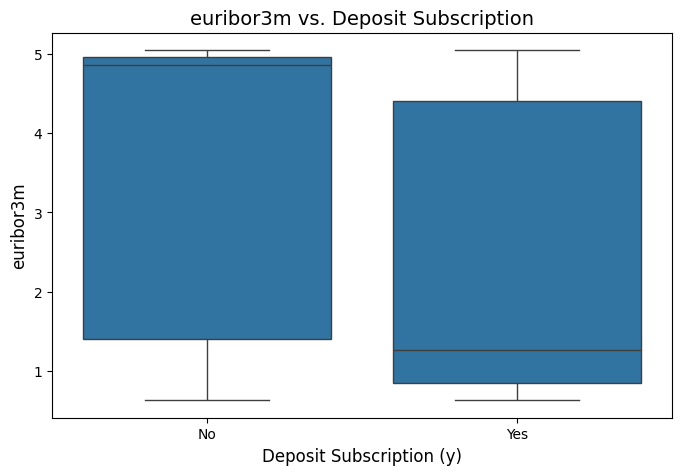

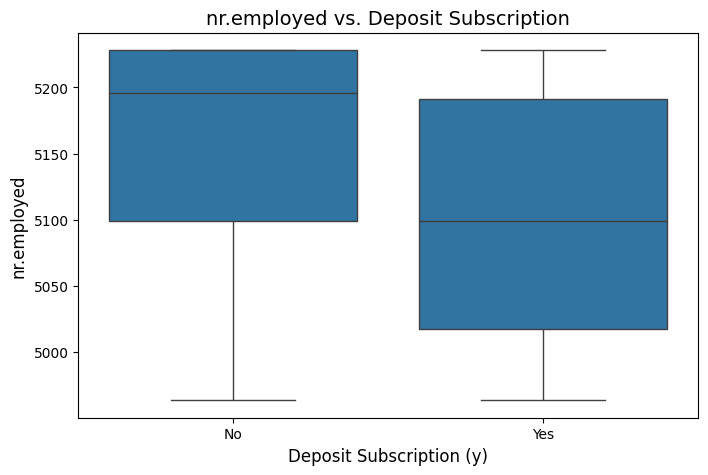

In [6]:
# --- Boxplots of Numerical Features vs. Target ---
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='y', y=feature, data=data)
    plt.title(f'{feature} vs. Deposit Subscription', fontsize=14)
    plt.xlabel('Deposit Subscription (y)', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks([0, 1], ['No', 'Yes']) # Label x-axis ticks
    plt.show()

## **2.3. Summary Statistics for Numerical Features**
- We use the `describe()` method to generate summary statistics for all numerical columns. This provides a statistical overview of central tendency, dispersion, and range for each feature.


In [7]:
# --- Summary Statistics ---
print("\nSummary Statistics for Numerical Features:")
display(data.describe()) # Use display() for better formatting in notebooks


Summary Statistics for Numerical Features:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Analysis of Summary Statistics:**

The `describe()` method provides key statistical insights into our numerical features. Let's break down what each statistic means and what we can observe from the output:

*   **Count:**  For all features, the count is 41188.0, which matches the total number of entries we saw earlier in `data.info()`. This confirms we have complete data for all numerical columns, with no missing values as also verified in our missing value check.

*   **Mean (Average):**
    *   **age:** The average age of clients is approximately 40 years old. This gives us a sense of the typical customer demographic being targeted.
    *   **duration:** The average call duration is around 258 seconds (a little over 4 minutes).  However, we need to be cautious interpreting this directly for prediction as discussed previously.
    *   **campaign:** On average, clients are contacted approximately 2.5 times during a campaign. This suggests campaigns might involve multiple contact attempts.
    *   **pdays:** The mean `pdays` is very high at 962 days, close to the value 999 we know signifies "client was not previously contacted." This reinforces our understanding that most clients in this dataset were contacted for the first time during the current campaign.
    *   **previous:** The average number of previous contacts is very low (0.17), again supporting that most clients are new contacts.
    *   **emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed:** These are macroeconomic indicators. The means of these features give us a central value, but their interpretation is more meaningful when considered in the context of their ranges and distributions (and potentially in feature importance analysis later). For instance, `cons.conf.idx` has a negative mean, which is within its possible range and suggests generally negative consumer confidence during the period of data collection.

*   **Standard Deviation (std):**  This measures the dispersion or spread of the data around the mean.
    *   **duration:**  Has a relatively high standard deviation (259), close to the mean itself, indicating a wide variability in call durations. This is also visible in the histogram where the distribution is skewed.
    *   **age:**  Standard deviation of around 10 years suggests a moderate spread in client ages.
    *   **campaign:** Standard deviation of 2.77, similar to the mean, indicates variability in the number of contacts, with some clients being contacted many more times than others.
    *   **pdays:**  Has a low standard deviation compared to its mean, but this is misleading because of the 999 value.  After we transform 999 to 0 and consider it as a binary 'previously contacted' feature, the interpretation changes.
    *   **Macroeconomic features:** Have varying standard deviations reflecting their fluctuations and volatility within the dataset's timeframe.

*   **Minimum (min) and Maximum (max):**  These show the range of values for each feature.
    *   **age:** Ranges from 17 to 98, covering a broad adult age range.
    *   **duration:** Ranges from 0 to a very high 4918 seconds. A duration of 0 seconds is unusual and might represent missed calls or data entry issues; it's worth investigating further if truly zero duration calls are valid in this context. The high maximum duration suggests some very lengthy calls.
    *   **campaign:** Ranges from 1 to 56 contacts, showing some extreme cases of repeated contact attempts.
    *   **pdays:** Ranges from 0 to 999, as expected.
    *   **Macroeconomic features:** Show their respective typical ranges. `cons.conf.idx` reaches a minimum of -50.8, reflecting very low consumer confidence in some instances.

*   **Percentiles (25%, 50%, 75%):** These divide the data into quarters. The 50% percentile is also the median.
    *   **age:**  50% of clients are younger than 38, and 75% are younger than 47.
    *   **duration:** 50% of calls are shorter than 180 seconds (3 minutes), and 75% are shorter than about 5 minutes. This, combined with the high maximum, indicates a right-skewed distribution with many short calls and fewer very long calls.
    *   **pdays:** 75% of values are 999, again highlighting the prevalence of first-time contacts in this dataset.

**In summary, the summary statistics give us a quantitative overview of the numerical features.  Key takeaways include:**

*   Typical client age is around 40.
*   Call durations are highly variable and skewed towards shorter calls.
*   Campaigns involve a few contacts on average, but there are outliers with many more attempts.
*   Most clients are new contacts (high `pdays` values).
*   Macroeconomic indicators show a range of economic conditions during the data collection period.

These insights, combined with the distributions and boxplots we're adding, will give us a more comprehensive understanding of the numerical data for our bank marketing analysis.

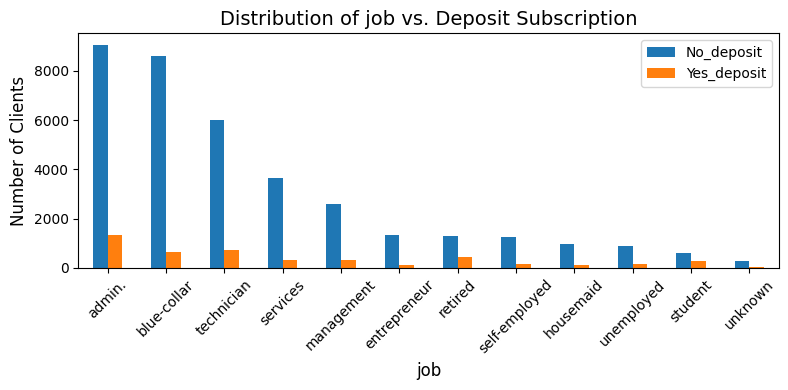

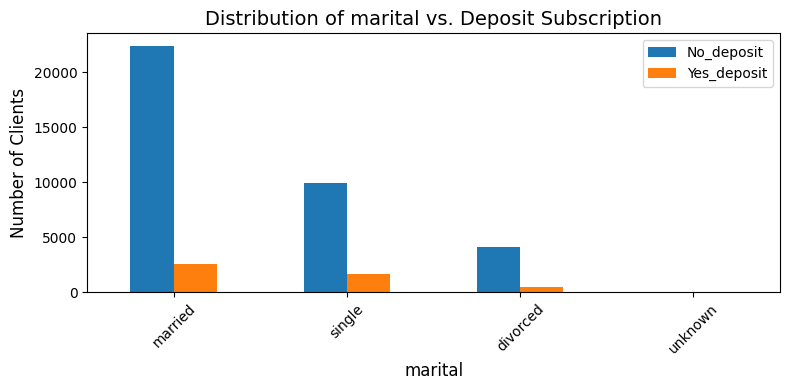

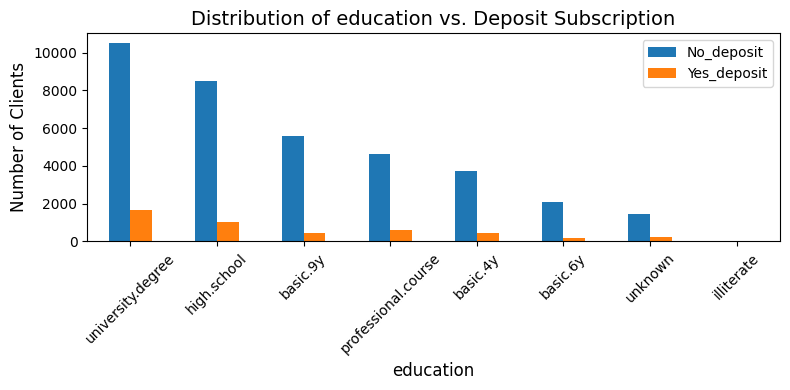

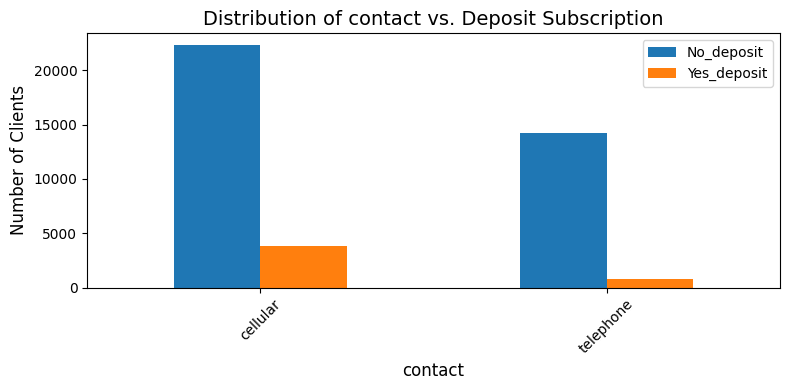

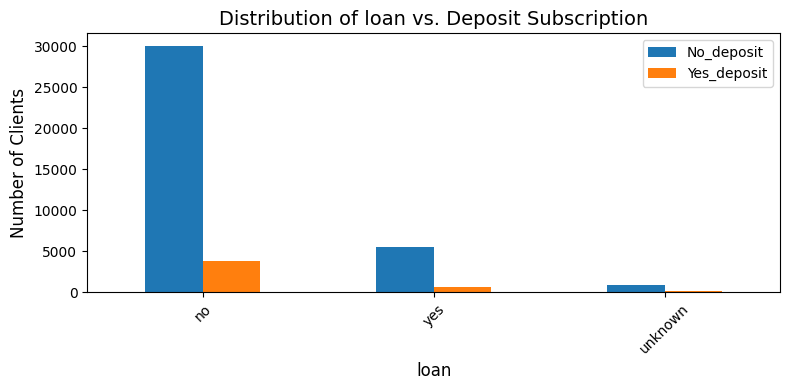

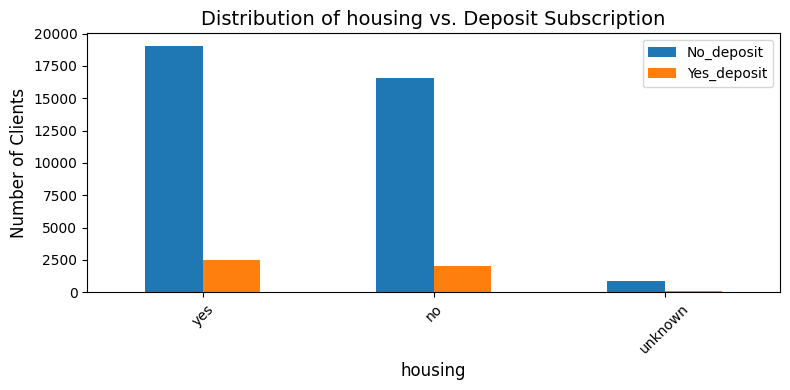

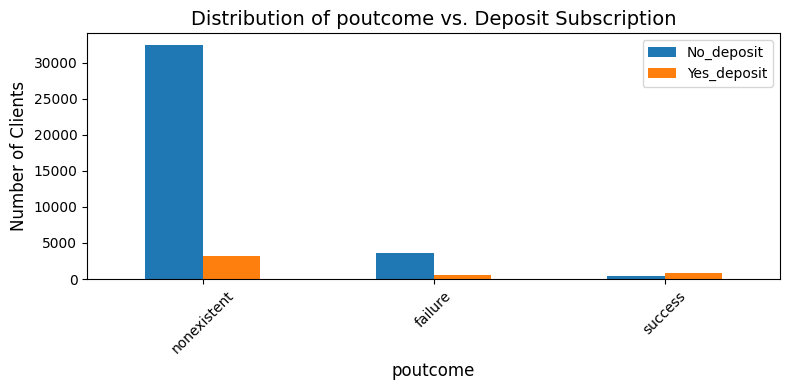

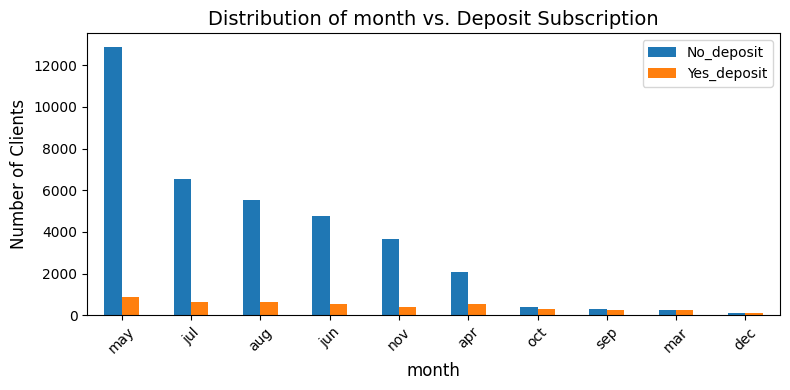

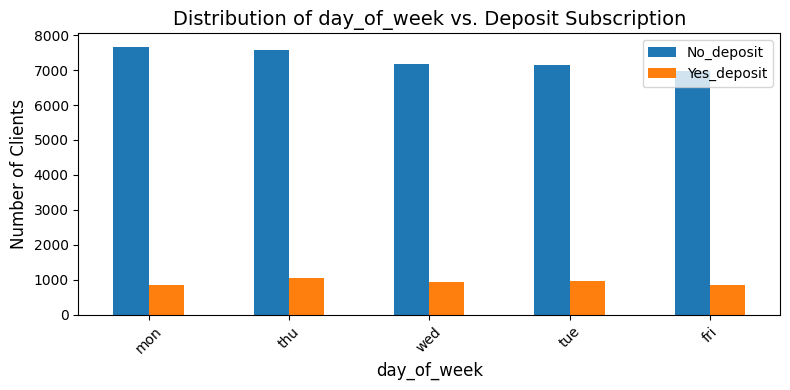

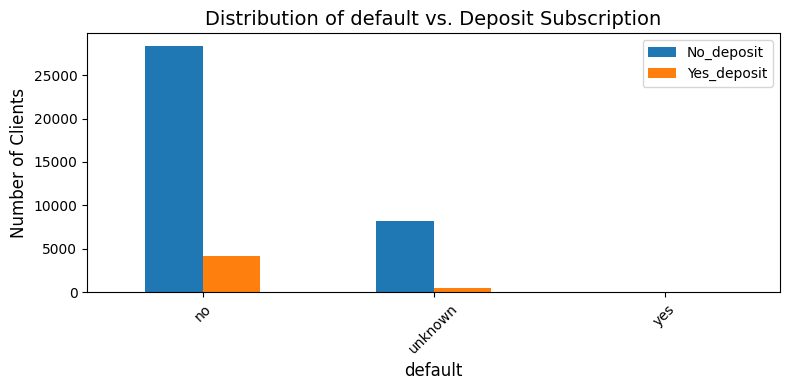

In [8]:
# Function to plot the distribution of a categorical feature against the deposit status
def plot_bar(column):
    """
    Plots the distribution of a categorical feature against the 'deposit' status.

    Args:
        column (str): Name of the categorical column to visualize.
    """
    temp_df = pd.DataFrame() # Temporary DataFrame to store counts for each category and deposit status
    temp_df['No_deposit'] = data[data['y'] == 'no'][column].value_counts() # Count occurrences for 'no' deposit
    temp_df['Yes_deposit'] = data[data['y'] == 'yes'][column].value_counts() # Count occurrences for 'yes' deposit
    temp_df.plot(kind='bar', figsize=(8, 4)) # Create a bar plot
    plt.xlabel(column, fontsize=12) # Set x-axis label
    plt.ylabel('Number of Clients', fontsize=12) # Set y-axis label
    plt.title('Distribution of {} vs. Deposit Subscription'.format(column), fontsize=14) # Set plot title
    plt.xticks(rotation=45) # Rotate x-axis labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show() # Display the plot

# Plotting distributions for key categorical features to understand their impact on the target variable
categorical_features = ['job', 'marital', 'education', 'contact', 'loan', 'housing', 'poutcome', 'month', 'day_of_week', 'default']
for feature in categorical_features:
    plot_bar(feature)



# **Observations from the EDA:**  
 - Certain jobs (e.g., administrative and technical roles) show higher deposit subscriptions.
 - Although married clients have a high absolute number, single clients tend to have a better response rate.
 - The communication channel shows that cellular contact might be more effective.
 - Clients with existing bank services (e.g., loans) appear less likely to subscribe.
 - Home ownership does not have a significant impact on the campaign outcome.



# 3. Data Cleaning and Feature Engineering

We now perform a series of data transformations including:

 - Converting the target variable to numeric.
 - Mapping categorical features to numeric values (e.g., binary mapping for contact, loan, and housing).
 - Binning the duration of calls into categories.
 - One-hot encoding of select categorical features.
 - Target encoding for features with multiple levels.


In [9]:
# Antes de mapear, si aún tenemos los valores originales:
print("Valores únicos en 'y' (antes de mapear):")
print(data['y'].value_counts(dropna=False))


Valores únicos en 'y' (antes de mapear):
y
no     36548
yes     4640
Name: count, dtype: int64


In [10]:
# Reemplazar 'no' por 0 y 'yes' por 1
data['y'] = data['y'].replace({'no': 0, 'yes': 1}).astype('uint8')

# Verificamos los valores únicos y sus tipos
print(data['y'].value_counts())
print(data['y'].dtype)



y
0    36548
1     4640
Name: count, dtype: int64
uint8


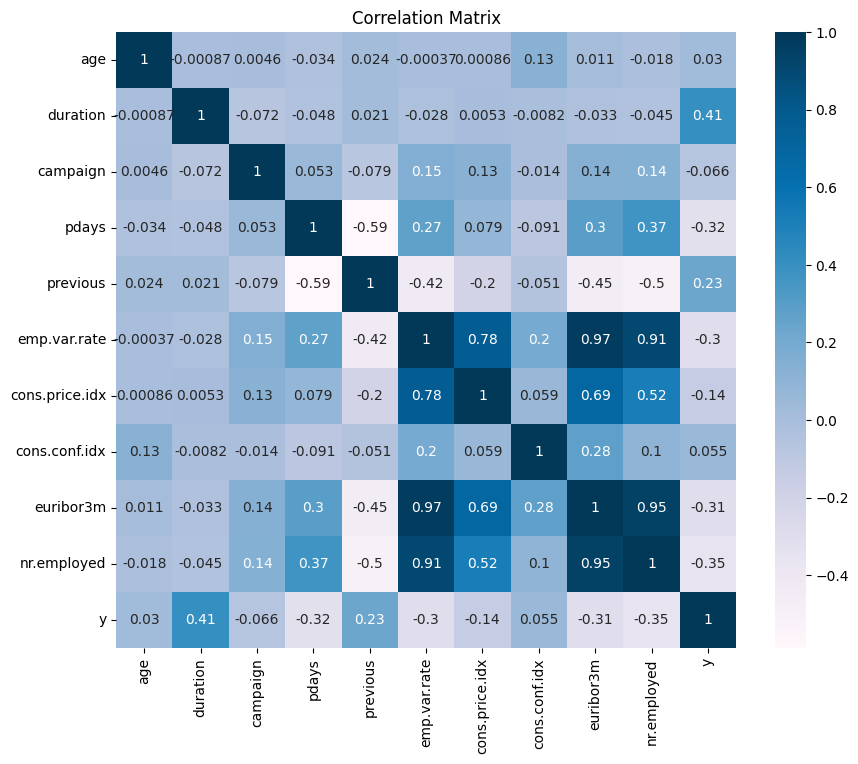

In [11]:
# Seleccionar solo las columnas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
corr = numeric_data.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='PuBu', annot=True)
plt.title("Correlation Matrix")
plt.show()



## **3.1. Transforming Categorical Variables**

**Objective:** Convert categorical features into numerical representations.

- In this subsection, we will focus on converting categorical features into numerical formats that are suitable for machine learning algorithms. This involves binary mapping for certain features and handling 'unknown' values appropriately.



In [12]:
# --- Binary Mapping for Categorical Features ---
# Map 'contact' to binary (cellular: 1, telephone: 0)
data['contact'] = data['contact'].map({'cellular': 1, 'telephone': 0}).astype('uint8')
# Map 'loan' to binary (yes: 1, no/unknown: 0) - treating 'unknown' as 'no' for simplicity
data['loan'] = data['loan'].map({'yes': 1, 'unknown': 0, 'no': 0}).astype('uint8')
# Map 'housing' to binary (yes: 1, no/unknown: 0) - treating 'unknown' as 'no' for simplicity
data['housing'] = data['housing'].map({'yes': 1, 'unknown': 0, 'no': 0}).astype('uint8')
# Map 'default' to binary (no: 1, yes/unknown: 0) - considering 'no default' as positive and others as negative
data['default'] = data['default'].map({'no': 1, 'unknown': 0, 'yes': 0}).astype('uint8')


In [13]:
# --- Transforming 'pdays' and 'previous' ---
# Replace 'pdays' value 999 with 0 to indicate 'not previously contacted'
data['pdays'] = data['pdays'].replace(999, 0)
# Convert 'previous' to binary (contacted before: 1, never contacted: 0)
data['previous'] = data['previous'].apply(lambda x: 1 if x > 0 else 0).astype('uint8')

# --- Transforming 'poutcome' ---
# Map 'poutcome' to binary (success: 1, failure/nonexistent: 0)
data['poutcome'] = data['poutcome'].map({'nonexistent': 0, 'failure': 0, 'success': 1}).astype('uint8')



## **3.2. Transforming and Scaling Numerical Variables**
**Objective:**  Standardize or scale numerical features for optimal model performance.

**Based on our EDA** and to ensure features are on comparable scales, we will apply standard scaling to the numerical features.  We will initially use StandardScaler for simplicity and interpretability.  More complex, non-linear transformations will be avoided unless strongly justified by further analysis or model performance needs.



In [14]:
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# --- Scaling Numerical Features using StandardScaler ---
numerical_features_to_scale = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected numerical features
data[numerical_features_to_scale] = scaler.fit_transform(data[numerical_features_to_scale])

# Display first few rows after scaling to verify
print("First 5 rows of dataset after scaling numerical features:")
display(data.head())


First 5 rows of dataset after scaling numerical features:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,housemaid,married,basic.4y,1,0,0,0,may,mon,...,-0.565922,-0.164012,-0.397706,0,0.648092,0.722722,0.886447,0.71246,0.33168,0
1,1.628993,services,married,high.school,0,0,0,0,may,mon,...,-0.565922,-0.164012,-0.397706,0,0.648092,0.722722,0.886447,0.71246,0.33168,0
2,-0.290186,services,married,high.school,1,1,0,0,may,mon,...,-0.565922,-0.164012,-0.397706,0,0.648092,0.722722,0.886447,0.71246,0.33168,0
3,-0.002309,admin.,married,basic.6y,1,0,0,0,may,mon,...,-0.565922,-0.164012,-0.397706,0,0.648092,0.722722,0.886447,0.71246,0.33168,0
4,1.533034,services,married,high.school,1,0,1,0,may,mon,...,-0.565922,-0.164012,-0.397706,0,0.648092,0.722722,0.886447,0.71246,0.33168,0


## **3.3. Encoding Categorical Variables**

**Objective:**  Implement One-Hot Encoding for multi-category categorical features.

- In this step, we use One-Hot Encoding to convert multi-category nominal features into a numerical format. This is essential for most machine learning algorithms to effectively process categorical data. We will encode 'job', 'month', and 'day_of_week'.



In [14]:
# Function for One-Hot Encoding
def encode(data, col):
    """
    Performs one-hot encoding on the specified column of the DataFrame.

    Args:
        data (pd.DataFrame): DataFrame containing the column to encode.
        col (pd.Series): Column to be one-hot encoded.

    Returns:
        pd.DataFrame: DataFrame with the encoded columns appended and original column dropped.
    """
    dummies = pd.get_dummies(col, prefix=col.name, dtype=int) # Create dummy variables, ensure int type
    return pd.concat([data, dummies], axis=1) # Concatenate dummies to original DataFrame

# Apply One-Hot Encoding to 'job', 'month', and 'day_of_week'
data = encode(data, data['job']) # Encode 'job'
data = encode(data, data['month']) # Encode 'month'
data = encode(data, data['day_of_week']) # Encode 'day_of_week'

# Drop original categorical columns as they are now encoded
data.drop(['job', 'month', 'day_of_week'], axis=1, inplace=True)

# --- Remove duplicate rows ---
# Drop duplicate rows from the dataset to avoid data redundancy and potential model bias
data.drop_duplicates(inplace=True)


## **3.4. Binning the Duration Feature**

**Objective:** Categorize the 'duration' feature to reduce its predictive bias.

- The 'duration' of a call is highly predictive of the outcome but is not known before a real-world call. To make our model more realistic and applicable, we bin the 'duration' into categories. This transformation reduces the direct influence of 'duration' while still allowing the model to capture some information related to call length.


In [15]:
def bin_duration(df):
    """
    Bins the 'duration' feature into 5 categories based on specified intervals.

    Args:
        df (pd.DataFrame): DataFrame containing the 'duration' column.

    Returns:
        pd.DataFrame: DataFrame with 'duration' column binned into categories.
    """
    df.loc[df['duration'] <= 102, 'duration'] = 1 # Category 1: duration <= 102 seconds
    df.loc[(df['duration'] > 102) & (df['duration'] <= 180), 'duration'] = 2 # Category 2: 102 < duration <= 180
    df.loc[(df['duration'] > 180) & (df['duration'] <= 319), 'duration'] = 3 # Category 3: 180 < duration <= 319
    df.loc[(df['duration'] > 319) & (df['duration'] <= 645), 'duration'] = 4 # Category 4: 319 < duration <= 645
    df.loc[df['duration'] > 645, 'duration'] = 5 # Category 5: duration > 645
    return df

data = bin_duration(data) # Apply binning to the 'duration' feature

## **3.5. Target Encoding for Multi-Level Categorical Features**

**Objective:** Apply Target Encoding to `marital` and `education`.

- For categorical features with multiple levels like `marital` and `education`, One-Hot Encoding can lead to high dimensionality. Target Encoding is an effective alternative that replaces each category with the mean of the target variable for that category. This can capture more information in fewer dimensions, potentially benefiting model performance.



In [18]:
# Separate the target variable
y = data['y']

# Initialize and apply Target Encoding on 'marital' and 'education'
target_encoder = ce.target_encoder.TargetEncoder(cols=['marital', 'education'])
numeric_dataset = target_encoder.fit_transform(data, y) # Fit and transform simultaneously

# Drop the target variable 'y' from the feature set as it's now encoded
numeric_dataset.drop('y', axis=1, inplace=True)

# Display the first 3 rows of the transformed numeric dataset and dataset shapes
print("First 10 rows of the transformed numeric dataset:")
display(numeric_dataset.head(10))
print("\nNumeric dataset shape:", numeric_dataset.shape)
print("Target variable shape:", y.shape)


First 10 rows of the transformed numeric dataset:


,age,marital,education,default,housing,loan,contact,duration,campaign,pdays,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,0.101561,0.102490,1,0,0,0,3,1,0,...,0,1,0,0,0,0,1,0,0,0
1,57,0.101561,0.108389,0,0,0,0,2,1,0,...,0,1,0,0,0,0,1,0,0,0
2,37,0.101561,0.108389,1,1,0,0,3,1,0,...,0,1,0,0,0,0,1,0,0,0
3,40,0.101561,0.082060,1,0,0,0,2,1,0,...,0,1,0,0,0,0,1,0,0,0
4,56,0.101561,0.108389,1,0,1,0,3,1,0,...,0,1,0,0,0,0,1,0,0,0
5,45,0.101561,0.078246,0,0,0,0,3,1,0,...,0,1,0,0,0,0,1,0,0,0
6,59,0.101561,0.113550,1,0,0,0,2,1,0,...,0,1,0,0,0,0,1,0,0,0
7,41,0.101561,0.145087,0,0,0,0,3,1,0,...,0,1,0,0,0,0,1,0,0,0
8,24,0.140090,0.113550,1,1,0,0,4,1,0,...,0,1,0,0,0,0,1,0,0,0
9,25,0.140090,0.108389,1,1,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,0



Numeric dataset shape: (41176, 44)
Target variable shape: (41176,)


## **4. Model Building and Evaluation**

**Objective:** Build and evaluate various machine learning models to predict term deposit subscription.

- In this section, we will build and evaluate several classification models to predict whether a client will subscribe to a term deposit. We will use a pipeline approach for each model, incorporating hyperparameter tuning with Grid Search and performance evaluation using accuracy and ROC-AUC. The models we will explore include Logistic Regression, Random Forest, K-Nearest Neighbors, Decision Tree, Bagging Classifier, and SGD Classifier.


In [19]:
# --- Data Splitting ---
# Split the dataset into training and testing sets to evaluate model performance on unseen data
random_state = 11 # Define a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(numeric_dataset, y, test_size=0.2, random_state=random_state, stratify=y) # Stratify split to maintain class balance
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

# --- Pipeline Setup ---
n_jobs = -1 # Use all available CPU cores for parallel processing

# Define pipelines for each classifier. Pipelines streamline the process and ensure consistent preprocessing.
pipe_lr = Pipeline([('lr', LogisticRegression(random_state=random_state, n_jobs=n_jobs, max_iter=500))]) # Logistic Regression pipeline
pipe_rf = Pipeline([('rf', RandomForestClassifier(random_state=random_state, oob_score=True, n_jobs=n_jobs))]) # Random Forest pipeline
pipe_knn = Pipeline([('knn', KNeighborsClassifier(n_jobs=n_jobs))]) # K-Nearest Neighbors pipeline
pipe_dt = Pipeline([('dt', DecisionTreeClassifier(random_state=random_state, max_features='sqrt'))]) # Decision Tree pipeline
pipe_bag = Pipeline([ # Bagging Classifier pipeline with SGDClassifier as base estimator
    ('bag', BaggingClassifier(
        estimator=SGDClassifier(random_state=random_state, n_jobs=n_jobs, max_iter=1500),
        random_state=random_state, oob_score=True, n_jobs=n_jobs
    ))
])
pipe_sgd = Pipeline([('sgd', SGDClassifier(random_state=random_state, n_jobs=n_jobs, max_iter=1500))]) # SGD Classifier pipeline

Training set: (32940, 44) (32940,)
Test set: (8236, 44) (8236,)


## **4.1. Hyperparameter Tuning with Grid Search**

**Objective:** Optimize model performance by tuning hyperparameters using Grid Search.

- To find the best parameters for each model, we will use Grid Search with cross-validation. Grid Search systematically explores a predefined set of hyperparameter values and identifies the combination that yields the best performance based on a chosen scoring metric (accuracy in this case). We will use Stratified K-Fold cross-validation to ensure class balance is maintained in each fold.


In [20]:
# --- Cross-Validation Setup ---
cv = StratifiedKFold(shuffle=True, n_splits=5, random_state=random_state) # Stratified K-Fold cross-validator

# --- Define Parameter Grids ---
# Parameter grids to be explored during Grid Search for each classifier.
grid_params_lr = { # Logistic Regression parameters
    'lr__penalty': ['l2'],
    'lr__C': [0.3, 0.6, 0.7],
    'lr__solver': ['sag']
}

grid_params_rf = { # Random Forest parameters
    'rf__criterion': ['entropy'],
    'rf__min_samples_leaf': [80, 100],
    'rf__max_depth': [25, 27],
    'rf__min_samples_split': [3, 5],
    'rf__n_estimators': [60, 70]
}

grid_params_knn = { # K-Nearest Neighbors parameters
    'knn__n_neighbors': [16, 17, 18]
}

grid_params_dt = { # Decision Tree parameters
    'dt__max_depth': [8, 10],
    'dt__min_samples_leaf': [1, 3, 5, 7]
}

grid_params_bag = { # Bagging Classifier parameters
    'bag__n_estimators': [10, 15, 20]
}

grid_params_sgd = { # SGD Classifier parameters
    'sgd__loss': ['log_loss', 'huber'],
    'sgd__learning_rate': ['adaptive'],
    'sgd__eta0': [0.001, 0.01, 0.1],
    'sgd__penalty': ['l1', 'l2', 'elasticnet'],
    'sgd__alpha': [0.1, 1, 5, 10]
}

# --- Initialize Grid Search Objects ---
# Create GridSearchCV objects for each pipeline with their respective parameter grids and cross-validation setup.
gs_lr = GridSearchCV(pipe_lr, param_grid=grid_params_lr, scoring='accuracy', cv=cv, verbose=1, error_score='raise', n_jobs=n_jobs)
gs_rf = GridSearchCV(pipe_rf, param_grid=grid_params_rf, scoring='accuracy', cv=cv, verbose=1, error_score='raise', n_jobs=n_jobs)
gs_knn = GridSearchCV(pipe_knn, param_grid=grid_params_knn, scoring='accuracy', cv=cv, verbose=1, error_score='raise', n_jobs=n_jobs)
gs_dt = GridSearchCV(pipe_dt, param_grid=grid_params_dt, scoring='accuracy', cv=cv, verbose=1, error_score='raise', n_jobs=n_jobs)
gs_bag = GridSearchCV(pipe_bag, param_grid=grid_params_bag, scoring='accuracy', cv=cv, verbose=1, error_score='raise', n_jobs=n_jobs)
gs_sgd = GridSearchCV(pipe_sgd, param_grid=grid_params_sgd, scoring='accuracy', cv=cv, verbose=1, error_score='raise', n_jobs=n_jobs)

# Store Grid Search objects and model names for easy iteration and result tracking
look_for = [gs_lr, gs_rf, gs_knn, gs_dt, gs_bag, gs_sgd] # List of Grid Search objects
model_dict = { # Dictionary mapping index to model names
    0: 'Logistic Regression',
    1: 'Random Forest',
    2: 'K-Nearest Neighbors',
    3: 'Decision Tree',
    4: 'Bagging (with SGDClassifier)',
    5: 'SGD Classifier'
}


## **4.2. Model Training and Evaluation**

**Objective:** Train and evaluate each model using Grid Search and record performance metrics.

- In this phase, we will iterate through each model, train it using Grid Search to find the best hyperparameters, and then evaluate its performance on both cross-validation and the test set. We will record accuracy and ROC-AUC scores to compare model effectiveness.



In [21]:
result_acc = {} # Dictionary to store accuracy results
result_auc = {} # Dictionary to store ROC-AUC results
models = [] # List to store best estimator models

# Iterate through each model for training and evaluation using tqdm for progress visualization
for index, model in enumerate(tqdm(look_for, desc="Training models")):
    start = time.time() # Record start time for training duration
    print("\n Start Model: {} ".format(model_dict[index]))
    model.fit(X_train, y_train) # Fit the Grid Search model on training data
    print('Best Parameters:', model.best_params_) # Print the best hyperparameters found by Grid Search
    print('Best Cross-Validation Score:', model.best_score_) # Print the best cross-validation score

    # Calculate ROC-AUC on the test set using predict_proba if available
    try:
        y_proba = model.predict_proba(X_test)[:, 1] # Get probability predictions for ROC-AUC calculation
        auc = roc_auc_score(y_test, y_proba) # Calculate ROC-AUC score
    except AttributeError: # Handle models without predict_proba method
        auc = np.nan # Set AUC to NaN if predict_proba is not available
    print('Test ROC-AUC: {} | Test Accuracy: {}'.format(auc, model.score(X_test, y_test))) # Print test set metrics
    end = time.time() # Record end time
    print('Time taken: {} seconds'.format(round(end - start, 3))) # Print training time
    print(" End Model: {} \n".format(model_dict[index]))

    models.append(model.best_estimator_) # Store the best estimator model
    result_acc[index] = model.best_score_ # Store cross-validation accuracy
    result_auc[index] = auc # Store test ROC-AUC score

Training models:   0%|          | 0/6 [00:00<?, ?it/s]


 Start Model: Logistic Regression 
Fitting 5 folds for each of 3 candidates, totalling 15 fits


Training models:  17%|█▋        | 1/6 [00:33<02:49, 33.95s/it]

Best Parameters: {'lr__C': 0.7, 'lr__penalty': 'l2', 'lr__solver': 'sag'}
Best Cross-Validation Score: 0.8929568913175471
Test ROC-AUC: 0.8764055215823945 | Test Accuracy: 0.8974016512870325
Time taken: 33.947 seconds
 End Model: Logistic Regression 


 Start Model: Random Forest 
Fitting 5 folds for each of 16 candidates, totalling 80 fits


Training models:  33%|███▎      | 2/6 [00:51<01:37, 24.26s/it]

Best Parameters: {'rf__criterion': 'entropy', 'rf__max_depth': 25, 'rf__min_samples_leaf': 80, 'rf__min_samples_split': 3, 'rf__n_estimators': 70}
Best Cross-Validation Score: 0.9047662416514874
Test ROC-AUC: 0.9341510484495028 | Test Accuracy: 0.9069936862554638
Time taken: 17.483 seconds
 End Model: Random Forest 


 Start Model: K-Nearest Neighbors 
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'knn__n_neighbors': 17}
Best Cross-Validation Score: 0.9002732240437158


Training models:  50%|█████     | 3/6 [00:56<00:46, 15.49s/it]

Test ROC-AUC: 0.9103417458194136 | Test Accuracy: 0.9043224866440019
Time taken: 5.045 seconds
 End Model: K-Nearest Neighbors 


 Start Model: Decision Tree 
Fitting 5 folds for each of 8 candidates, totalling 40 fits


Training models:  67%|██████▋   | 4/6 [00:56<00:19,  9.55s/it]

Best Parameters: {'dt__max_depth': 10, 'dt__min_samples_leaf': 3}
Best Cross-Validation Score: 0.9034304796599878
Test ROC-AUC: 0.8897625476567956 | Test Accuracy: 0.9054152501214182
Time taken: 0.449 seconds
 End Model: Decision Tree 


 Start Model: Bagging (with SGDClassifier) 
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'bag__n_estimators': 10}
Best Cross-Validation Score: 0.889860352155434


Training models:  83%|████████▎ | 5/6 [01:32<00:18, 18.78s/it]

Test ROC-AUC: 0.7282558497536945 | Test Accuracy: 0.8929091792132103
Time taken: 35.136 seconds
 End Model: Bagging (with SGDClassifier) 


 Start Model: SGD Classifier 
Fitting 5 folds for each of 72 candidates, totalling 360 fits


Training models: 100%|██████████| 6/6 [02:13<00:00, 22.19s/it]

Best Parameters: {'sgd__alpha': 0.1, 'sgd__eta0': 0.001, 'sgd__learning_rate': 'adaptive', 'sgd__loss': 'log_loss', 'sgd__penalty': 'l1'}
Best Cross-Validation Score: 0.8962052216150577
Test ROC-AUC: 0.8716559143970708 | Test Accuracy: 0.8848955803788247
Time taken: 41.07 seconds
 End Model: SGD Classifier 



## **4.3. Visualizing Grid Search Results**

**Objective:** Visualize and compare the performance of different models.

- After training and evaluating all models, we will visualize their performance metrics to facilitate comparison. We will plot both the cross-validation accuracy and test ROC-AUC for each model to understand their effectiveness in predicting term deposit subscriptions.



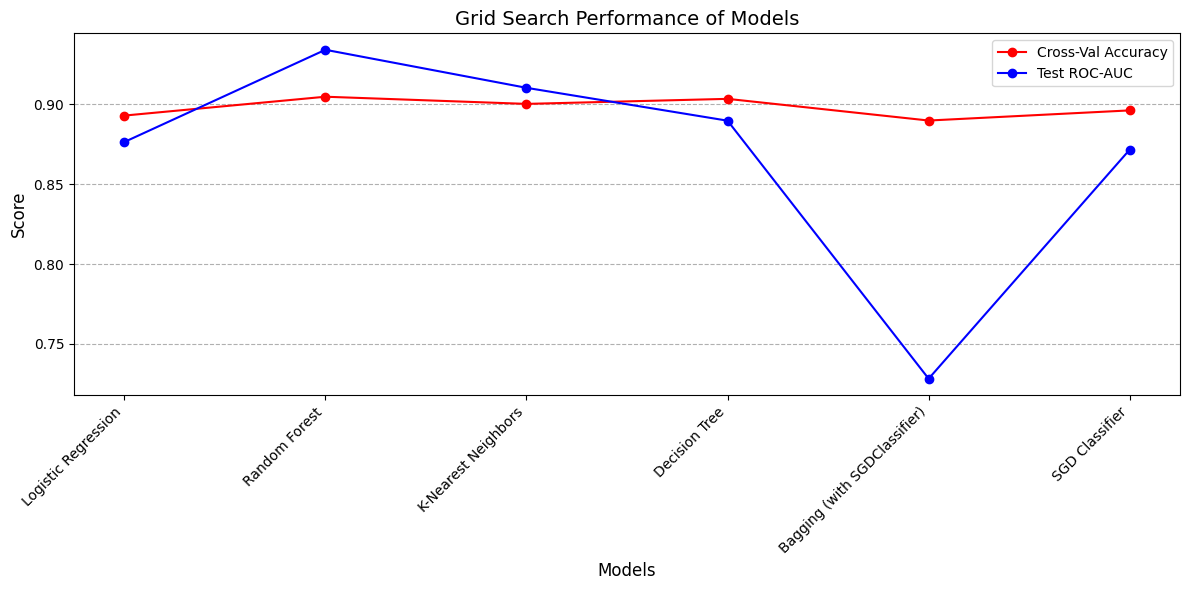

,Model,Cross-Val Accuracy,Test ROC-AUC
1,Random Forest,0.904766,0.934151
2,K-Nearest Neighbors,0.900273,0.910342
3,Decision Tree,0.903430,0.889763
0,Logistic Regression,0.892957,0.876406
5,SGD Classifier,0.896205,0.871656
4,Bagging (with SGDClassifier),0.889860,0.728256


In [22]:
# --- Performance Visualization ---
# Plotting accuracy and ROC-AUC scores for each model to compare performance
plt.figure(figsize=(12, 6))
plt.plot(list(model_dict.values()), list(result_acc.values()), 'ro-', label='Cross-Val Accuracy') # Plot cross-validation accuracy
plt.plot(list(model_dict.values()), list(result_auc.values()), 'bo-', label='Test ROC-AUC') # Plot test ROC-AUC
plt.xlabel('Models', fontsize=12) # Set x-axis label
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.ylabel('Score', fontsize=12) # Set y-axis label
plt.title('Grid Search Performance of Models', fontsize=14) # Set plot title
plt.legend(fontsize=10) # Display legend
plt.grid(axis='y', linestyle='--') # Add horizontal grid lines
plt.tight_layout() # Adjust layout
plt.show() # Show the plot

# --- Results Summary DataFrame ---
# Create a Pandas DataFrame to summarize the performance metrics of each model
results_df = pd.DataFrame({
    'Model': list(model_dict.values()), # Model names
    'Cross-Val Accuracy': list(result_acc.values()), # Cross-validation accuracies
    'Test ROC-AUC': list(result_auc.values()) # Test ROC-AUC scores
})
display(results_df.sort_values(by='Test ROC-AUC', ascending=False)) # Display results DataFrame sorted by Test ROC-AUC


# **5. In-depth Analysis of the Best Model**

**Objective:** Conduct a detailed analysis of the best-performing model, Random Forest.

- Based on the ROC-AUC scores, the **Random Forest** classifier demonstrates the best performance. In this section, we will delve deeper into the Random Forest model to understand its behavior and feature importance. We will analyze the Out-Of-Bag (OOB) score as a function of the number of trees, plot the ROC curve, and examine feature importances to gain insights into the model's decision-making process.



## **5.1. OOB Score Analysis for Random Forest**

**Objective:** Determine the optimal number of trees in the Random Forest model using OOB score.

- **Out-Of-Bag (OOB)** score is a method to evaluate the performance of a Random Forest model without using a separate validation set. It uses the samples that were not included in the bootstrap sample for training each tree. By plotting the OOB score against the number of trees, we can find an optimal number of estimators that maximizes performance without overfitting.



OOB Score Calculation: 100%|██████████| 39/39 [00:34<00:00,  1.14it/s]

Maximum OOB Score: 0.9050 with 130 estimators


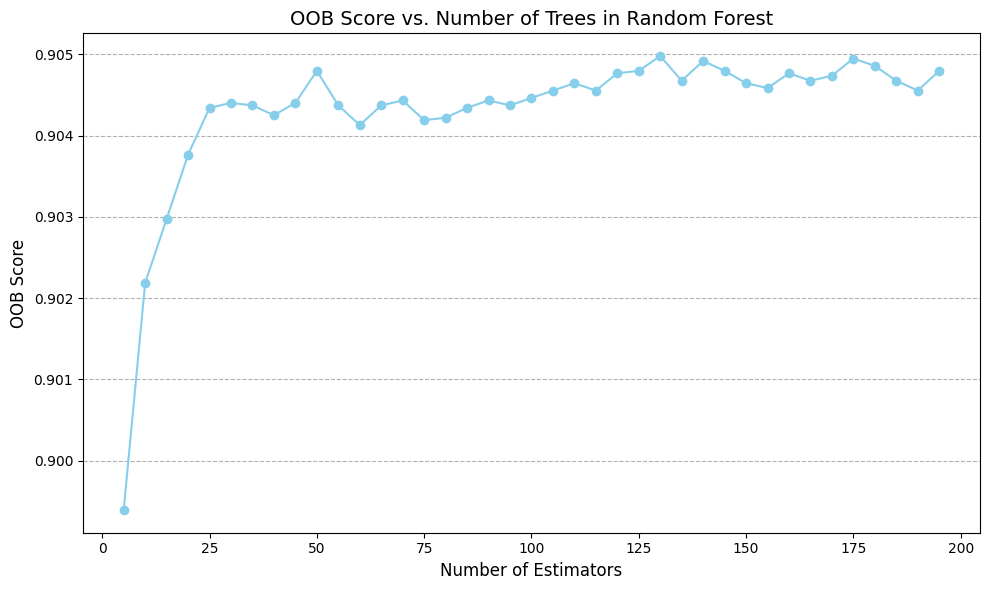

In [23]:
def plot_oob(model, X_train, y_train):
    """
    Plots the Out-Of-Bag (OOB) score for a Random Forest model against the number of estimators.

    Args:
        model (class): Random Forest classifier class (not an instance).
        X_train (pd.DataFrame): Training feature data.
        y_train (pd.Series): Training target data.
    """
    oob_scores = [] # List to store OOB scores for different numbers of estimators
    n_estimators_range = list(range(5, 200, 5)) # Range of estimators to test

    for n in tqdm(n_estimators_range, desc='OOB Score Calculation'): # Iterate through different numbers of estimators
        rf = model( # Initialize RandomForestClassifier with specified parameters
            n_estimators=n,
            criterion='entropy',
            random_state=11,
            oob_score=True,
            n_jobs=-1,
            max_depth=25,
            min_samples_leaf=80,
            min_samples_split=3
        )
        rf.fit(X_train, y_train) # Train the Random Forest model
        oob_scores.append(rf.oob_score_) # Append the OOB score

    best_oob = max(oob_scores) # Find the maximum OOB score
    best_n = n_estimators_range[np.argmax(oob_scores)] # Find the corresponding number of estimators
    print('Maximum OOB Score: {:.4f} with {} estimators'.format(best_oob, best_n)) # Print best OOB score and estimator count

    # Plot OOB score vs. Number of Estimators
    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators_range, oob_scores, marker='o', linestyle='-', color='skyblue') # Plotting OOB scores
    plt.xlabel('Number of Estimators', fontsize=12) # X-axis label
    plt.ylabel('OOB Score', fontsize=12) # Y-axis label
    plt.title('OOB Score vs. Number of Trees in Random Forest', fontsize=14) # Plot title
    plt.grid(axis='y', linestyle='--') # Horizontal grid lines
    plt.tight_layout() # Adjust layout
    plt.show() # Show plot

# Plot OOB score for RandomForestClassifier
plot_oob(RandomForestClassifier, X_train, y_train)

## **5.2. ROC Curve for the Best Random Forest Model**

**Objective:** Visualize the performance of the Random Forest model using a ROC Curve.

- The **ROC (Receiver Operating Characteristic) curve** is a graphical representation of the performance of a binary classifier system as its discrimination threshold is varied. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR). The closer the curve is to the top-left corner, the better the model performance. We will also include a baseline (random classifier) for comparison.



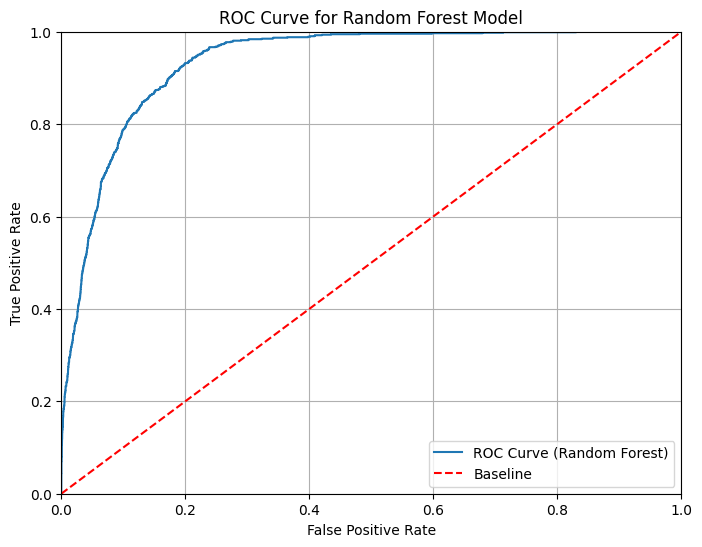

In [26]:
# --- Generate ROC Curve data ---
# Calculate False Positive Rate, True Positive Rate, and thresholds for the best Random Forest model
fpr, tpr, thresholds = roc_curve(y_test, models[1].predict_proba(X_test)[:, 1])

# --- Matplotlib ROC Curve Plot ---
plt.figure(figsize=(8, 6)) # Set figure size
plt.plot(fpr, tpr, label='ROC Curve (Random Forest)') # Plot ROC curve
plt.plot([0, 1], [0, 1], 'r--', label='Baseline') # Plot baseline (random classifier) in red dashed line
plt.xlabel('False Positive Rate') # X-axis label
plt.ylabel('True Positive Rate') # Y-axis label
plt.title('ROC Curve for Random Forest Model') # Plot title
plt.legend(loc="lower right") # Add legend in the lower right corner
plt.grid(True) # Add grid for better readability
plt.xlim([0, 1]) # Set x-axis limits from 0 to 1
plt.ylim([0, 1]) # Set y-axis limits from 0 to 1
plt.show() # Show the plot


## **5.3. Feature Importance**
**Objective:** Determine and visualize the most important features as identified by the Random Forest model.

- Feature importance in Random Forest provides insights into which features contribute most to the model's predictive power. Understanding feature importance is crucial for business insights, as it helps identify the factors that most strongly influence customer decisions regarding term deposits. We will visualize the top 10 most important features.



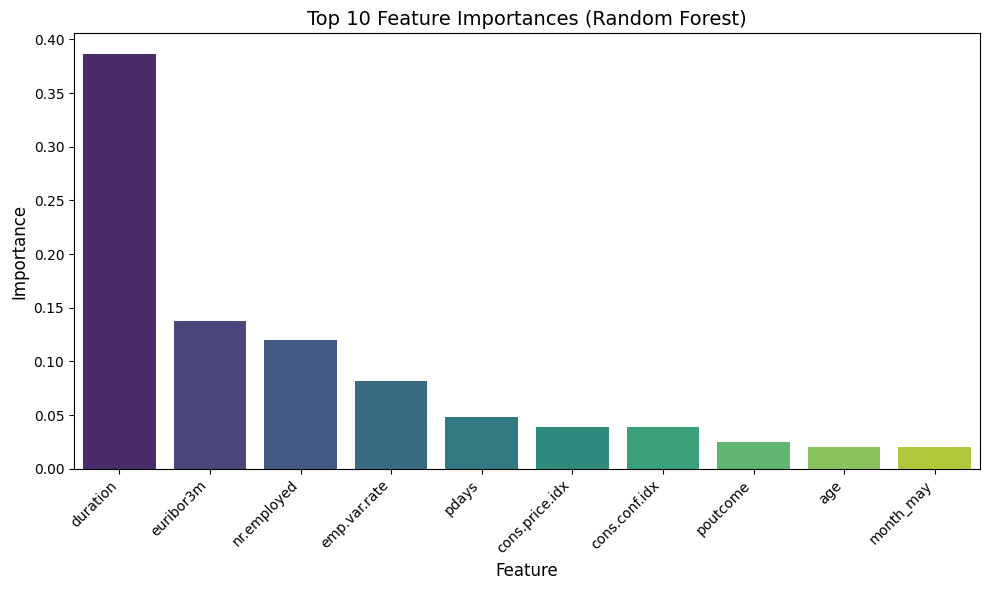

In [25]:
def plot_feature_importance(X_train, y_train):
    """
    Plots the top 10 feature importances from a Random Forest model.

    Args:
        X_train (pd.DataFrame): Training feature data.
        y_train (pd.Series): Training target data.
    """
    # Initialize and train RandomForestClassifier with best parameters from Grid Search
    rf = RandomForestClassifier(
        n_estimators=70,
        criterion='entropy',
        max_depth=25,
        min_samples_leaf=80,
        min_samples_split=3,
        random_state=11,
        oob_score=True,
        n_jobs=-1
    )
    rf.fit(X_train, y_train) # Train the Random Forest model

    # Create DataFrame of feature importances and sort them
    feat_importance = pd.DataFrame({
        'Feature': X_train.columns, # Feature names from training data
        'Importance': rf.feature_importances_ # Feature importances from trained Random Forest
    }).sort_values(by='Importance', ascending=False) # Sort by importance in descending order

    # Plotting top 10 feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Feature', y='Importance', data=feat_importance.head(10), palette="viridis") # Bar plot using Seaborn
    plt.title('Top 10 Feature Importances (Random Forest)', fontsize=14) # Plot title
    plt.xlabel('Feature', fontsize=12) # X-axis label
    plt.ylabel('Importance', fontsize=12) # Y-axis label
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
    plt.tight_layout() # Adjust layout
    plt.show() # Show plot

# Plot feature importances using the training data
plot_feature_importance(X_train, y_train)

## **6. Conclusions**

#### **Key Findings:**  
- **Duration of Call:** While 'duration' is highly correlated with campaign success, its impracticality for pre-call prediction led us to bin it, reducing direct model reliance but still capturing call length influence.

- **Socio-Economic Indicators:** Economic indicators like employment variation rate, consumer price index, and consumer confidence index are significant in model generalization, reflecting macro-economic sensitivity of term deposit subscriptions.

- **Effective Channels:** Cellular contacts are markedly more effective, and specific months (like May with high call volume but lower conversion, and March, September, October, December with better conversion) suggest channel and timing optimization opportunities.

- **Consumer Segmentation:** Single clients, students, and retirees are more responsive, pointing to targeted campaign potential for these demographic segments.


#### **Recommendations for Future Marketing Campaigns:**  

- **Micro-Targeting:** Concentrate marketing efforts on customer segments with higher propensity to subscribe, such as single individuals, students, and pensioners, to improve conversion rates and ROI.

- **Enhance Communication Strategy:** Prioritize cellular communication channels and optimize call timing based on monthly conversion patterns to maximize campaign effectiveness.

- **Develop Tailored Product Offers:** Create specific term deposit products that resonate with the financial profiles and needs of promising customer segments identified through our analysis.

- **Implement Automated Campaign Analysis:** Deploy this predictive model within an automated system for continuous analysis and refinement of marketing strategies, ensuring campaigns remain data-driven and adaptive to changing conditions.


By implementing these recommendations, the bank can potentially enhance the efficiency and effectiveness of its marketing campaigns, leading to improved customer acquisition and resource utilization. This analysis serves as a robust starting point for data-driven decision-making in bank marketing.
